<a href="https://colab.research.google.com/github/PrathameshKR/ML-projects/blob/main/ML-techniques/LinearRegressionModel(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

###Create device agnostic code
* this means if we have access to gpu then our code will use it else it will default to use cpu

In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


###Data

In [ ]:
#create some data using linear regression formula of y = weight*x + bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and y(features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) #unsqueezing to avoid dimensionnality errors later on
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#splitting the data into train split and test split
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

###Plotting our data

In [ ]:
def plot_predicitions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  plots training data,test data and compares predictions
  """
  plt.figure(figsize=(6,6))

  #plotting trainig data in blue
  plt.scatter(train_data,train_labels,c='b',s=5,label='Training Data')

  #plotting trainig data in green
  plt.scatter(test_data,test_labels,c='g',s=5,label='Testing Data')

  #check if there are any predictions, if yes then plot them
  if predictions is not None:
    #plotting predictions in red
    plt.scatter(test_data,predictions,c='r',s=5,label='Predictions')

  #show legend
  plt.legend(prop={"size":10})

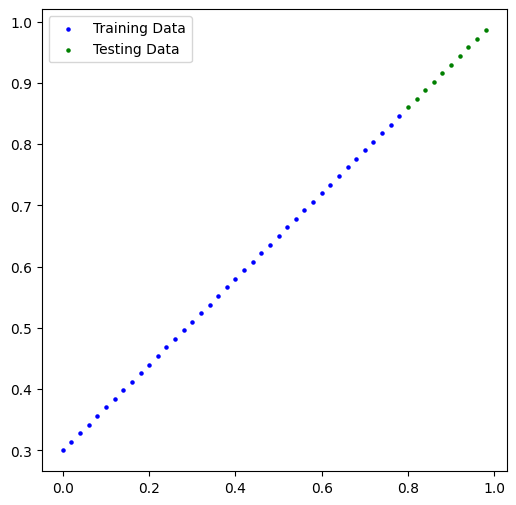

In [ ]:
plot_predicitions(X_train,y_train,X_test,y_test)

###Building our PyTorch model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating model parameters(also called linear transform,probing layer,fully connected layer,dense layer)
    self.linear_layer = nn.Linear(in_features=1,  #unlike above model where we intialized parameters here we are using built in function nn.Linear which will create parameters for us,also intialize them
                                  out_features=1)  #while training when nn.Module is called it uses its built in formula to calculate w & b

  def forward(self, x: torch.Tensor) -> torch.Tensor: #hence their is no neeed to specify formula in forward method rather we will call nn.Module
    return self.linear_layer(x)

#set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1,model_1.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

###Training Model

In [ ]:
#setup loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.01)

In [ ]:
###Training loop###
torch.manual_seed(42)

epochs = 200

#put data on taget device(device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  #step1:set model to training mode
  model_1.train()

  #step2:Forward pass
  y_pred = model_1(X_train)

  #step3:calculate loss
  loss = loss_fn(y_pred,y_train)

  #step4:zero the optimizer
  optimizer.zero_grad()

  #step5:perform back propogation
  loss.backward()

  #step6:step the optimizer
  optimizer.step()

###Testing loop###

#set model to test mode
  model_1.eval()
  with torch.inference_mode():
    #step1:do forward pass
    test_pred = model_1(X_test)

    #step2:calculate loss
    test_loss = loss_fn(test_pred,y_test)

    #print out whats' happenin'
    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch:0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch:10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch:20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch:30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch:40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch:50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch:60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch:70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch:80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch:90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch:100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch:110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch:120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch:130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch:140 

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

###Making and evaluating predictions

In [ ]:
#set model to test mode
model_1.eval()

#make predictions on test data
with torch.inference_mode():
  y_eval_preds = model_1(X_test)

y_eval_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

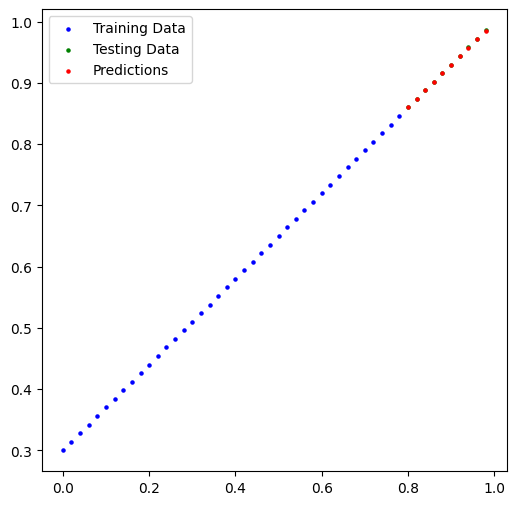

In [ ]:
#visualizing our model's predictions
plot_predicitions(predictions=y_eval_preds.cpu())

###Saving and loading model

In [ ]:
from pathlib import Path

#create models directory
MODEL_PATH = Path("PyTorchModels")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path
MODEL_NAME = "02_Linear_Regression_Model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model dict
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to : PyTorchModels/02_Linear_Regression_Model_1.pth


###Loading saved model

In [ ]:
#creating a new instance of model
loaded_model = LinearRegressionModel()

#load the saved model_1 state dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the loaded model to device
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
  y_pred_loaded_model = loaded_model(X_test)
y_pred_loaded_model == y_eval_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')